1. 테스트 파일 나눠서 자모비 돌리기
2. 제주지역

**Libraries**

In [21]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [22]:
from matplotlib import font_manager, rc
# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="/Windows/Fonts/nanumgothiccoding.ttf").get_name()
rc('font', family=font_name)

# Basic

In [26]:
jeju = pd.read_csv('./jeju_data_ver1/201901-202003.csv')

# Data Cleansing

In [27]:
# 날짜 처리

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

data = jeju.copy()
data = data.fillna('')

data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))

data = data.drop(['REG_YYMM'], axis = 1)

data

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,month,year
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,1,2019
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,1,2019
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,1,2019
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,1,2019
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4,3,2020
24697788,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3,3,2020
24697789,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6,3,2020
24697790,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6,3,2020


In [28]:
# 데이터 정제

data = data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis = 1)

columns =['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE',
          'SEX_CTGO_CD', 'FLC', 'year', 'month']
data = data.groupby(columns).sum().reset_index(drop = False)
data

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,4,311200,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,3,605000,3
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,3,139000,3
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,3,27500,3
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,3,395500,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,3,148000,4
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,5,329800,7
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,7,557800,7
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,3,247800,3


In [29]:
# 인코딩
# Object 문자로 된 컬럼은 LabelEncoder로 인덱스 도출 (범주형 데이터를 dummies화 시켜서 one-hot 인코딩 사용하는 것과 비슷한 기능)
from sklearn.preprocessing import LabelEncoder

dtypes = data.dtypes
encoders = {}

for column in data.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(data[column])
        encoders[column] = encoder
        
data_num = data.copy()
for column in encoders.keys():
    encoder = encoders[column]
    data_num[column] = encoder.transform(data[column])
    
data_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,0,0,0,1,1,1,2019,1,4,311200,4
1,0,0,0,1,1,1,2019,2,3,605000,3
2,0,0,0,1,1,1,2019,6,3,139000,3
3,0,0,0,1,1,1,2019,8,3,27500,3
4,0,0,0,1,1,1,2019,9,3,395500,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,16,40,16,6,2,5,2019,3,3,148000,4
1057390,16,40,16,6,2,5,2019,5,5,329800,7
1057391,16,40,16,6,2,5,2019,10,7,557800,7
1057392,16,40,16,6,2,5,2019,12,3,247800,3


# EDA

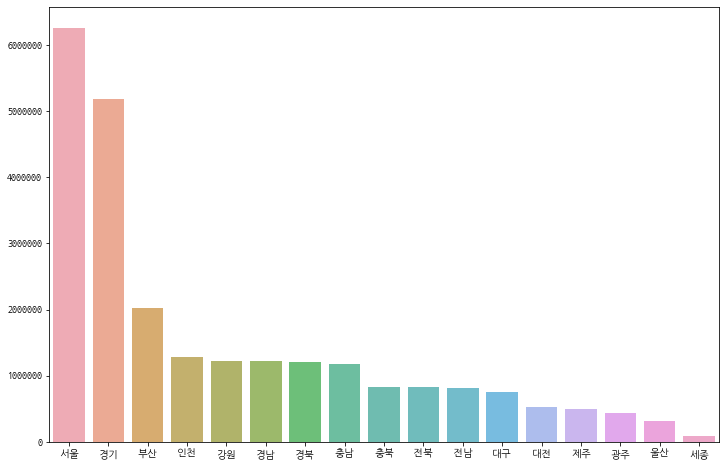

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cnt_srs = jeju.CARD_SIDO_NM.value_counts()

plt.figure(figsize = (12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.show()

카드 금액 사용량은 서울-경기-부산-인천 순이며, 제주는 14번째이다.

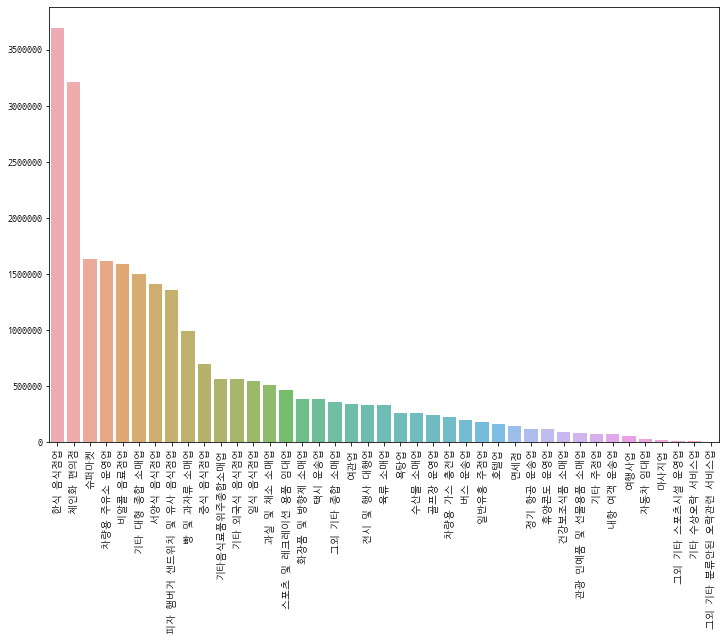

In [31]:
cnt_srs = jeju.STD_CLSS_NM.value_counts()

plt.figure(figsize = (12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

업종별로 보았을 때는 한식 음식점업-체인화 편의점이 월등히 높고\
10위까지 음식 및 소매업에 집중되었음을 확인할 수 있다.

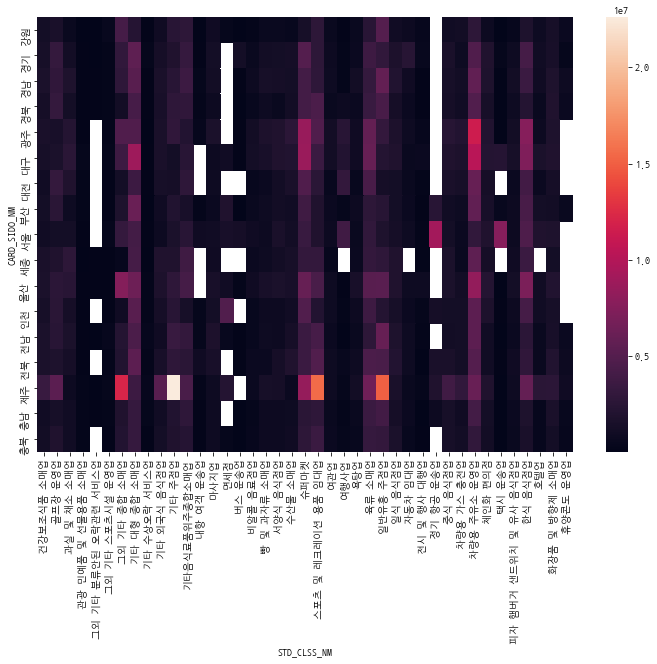

In [32]:
# jeju['AMT'] = jeju['AMT'][jeju['CARD_SIDO_NM']=='제주']*3

city_store = jeju.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].aggregate('mean').reset_index()
city_store = city_store.pivot('CARD_SIDO_NM','STD_CLSS_NM','AMT')

plt.figure(figsize=(12,8))
sns.heatmap(city_store)
plt.show()

카드 가맹점 직역 및 업종에 따른 카드 사용 금액의 평균값으로 보았을 때,\
제주의 '스포츠 및 레크레이션 용품 임대업'과 '일반유흥 주점업'이 높은 것을 볼 수 있다.

In [36]:
sns.pairplot(jeju)
plt.title('jeju data의 pair plot')

plt.show()

C:\Users\sundooedu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sundooedu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


KeyboardInterrupt: 

## KMeans - clustering

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(data_num)
pca_samples = pca.transform(data_num)

In [35]:
type(pca), type(pca_samples)

(sklearn.decomposition._pca.PCA, numpy.ndarray)

In [11]:
ps = pd.DataFrame(pca_samples)
ps.head(), ps.describe()

(              0           1           2          3          4         5
 0 -5.671204e+07 -474.261768  168.999129  22.565921 -11.115484 -0.119571
 1 -5.641824e+07 -489.749560  171.771685  22.566756 -11.114588 -0.123019
 2 -5.688424e+07 -467.147684  168.458590  22.572522 -11.110771 -0.136721
 3 -5.699574e+07 -461.739724  167.665864  22.575263 -11.108865 -0.143577
 4 -5.662774e+07 -479.588414  170.282215  22.576140 -11.107922 -0.147025,
                   0             1             2             3             4  \
 count  1.057394e+06  1.057394e+06  1.057394e+06  1.057394e+06  1.057394e+06   
 mean  -1.443622e-05  4.558143e-12  5.986586e-13  1.078473e-14  7.968180e-14   
 std    4.765743e+08  1.840934e+04  2.643264e+03  1.140078e+01  5.174014e+00   
 min   -5.702244e+07 -8.137086e+05 -1.325422e+05 -1.778052e+01 -1.114055e+01   
 25%   -5.678754e+07 -5.038811e+02  1.396084e+02 -1.116328e+01 -3.920895e+00   
 50%   -5.587837e+07 -4.632866e+02  1.655236e+02  6.144178e-01 -8.557940e-02   
 

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[2,3]])
print(tocluster.shape)
print(tocluster.head())

(1057394, 2)
            2          3
0  168.999129  22.565921
1  171.771685  22.566756
2  168.458590  22.572522
3  167.665864  22.575263
4  170.282215  22.576140


No handles with labels found to put in legend.
C:\Users\sundooedu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sundooedu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sundooedu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


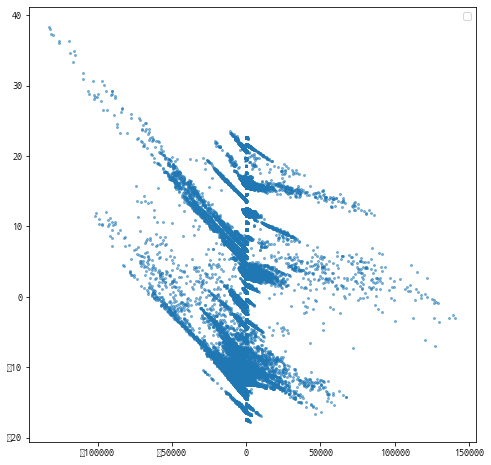

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[2], tocluster[3], 'o', markersize = 2, alpha = 0.5)

plt.legend()
plt.show()

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters = 16, random_state = 42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[ 1.42593770e+02  5.93186848e-02]
 [-4.47093052e+04  7.86930398e+00]
 [ 7.71850874e+04  4.45837635e+00]
 [ 1.60168086e+04  2.63206620e-01]
 [-1.70745849e+04 -2.42034750e-01]
 [-4.61187239e+03 -2.11446700e+00]
 [ 4.96645819e+04  4.47473534e-01]
 [-9.82536772e+04  2.20992878e+01]
 [ 7.32601675e+03  9.19856363e-01]
 [-2.94274539e+04  4.53644118e+00]
 [-9.64278060e+03 -2.11026435e+00]
 [-1.44345986e+03 -2.24438189e+00]
 [ 2.89602556e+04  1.85590397e+00]
 [ 2.44907244e+03  3.22508868e+00]
 [-6.26764232e+04  8.19894396e+00]
 [ 1.16616766e+05 -3.58410524e-01]]


IndexError: index 2 is out of bounds for axis 0 with size 2

C:\Users\sundooedu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sundooedu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


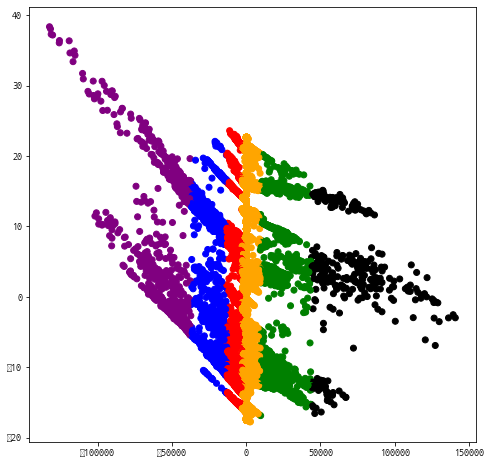

In [18]:
fig = plt.figure(figsize = (8,8))
colors = random
colored = [colors[k] for k in c_preds]

plt.scatter(tocluster[2], tocluster[3], color=colored)

for ci, c in enumerate(centers):
    plt.plot(c[2], c[3], 'o', markersize = 8, color = 'red', alpha = 0.9, label = ''+str(ci))
    
plt.legend()
plt.show()

# Feature Engineering & Initial Modeling

In [39]:
data_num.columns

Index(['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD',
       'FLC', 'year', 'month', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [40]:
X = data_num.drop(columns = ['CSTMR_CNT', 'AMT', 'CNT'])
Y = data_num['AMT']

In [41]:
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y, test_size = 0.3)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.3)

In [43]:
x_train.shape

(518122, 8)

In [46]:
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
layers.Input(8),
layers.Dense(32, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(1) ]) # output node size

model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=2, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/2
2024/2024 [==============================] - 3s 1ms/step - loss: 230907079739572224.0000 - accuracy: 0.0000e+00 - val_loss: 233717517359513600.0000 - val_accuracy: 0.0000e+00
Epoch 2/2
2024/2024 [==============================] - 3s 2ms/step - loss: 229668720409051136.0000 - accuracy: 0.0000e+00 - val_loss: 233709460000866304.0000 - val_accuracy: 0.0000e+00


In [47]:
X1 = data_num.drop(columns = ['AMT'])
Y1 = data_num['AMT']

x_train_all1, x_test1, y_train_all1, y_test1 = train_test_split(X1, Y1, test_size = 0.3)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train_all1, y_train_all1, test_size = 0.3)

In [50]:
# from tensorflow.keras import layers

model1 = tf.keras.models.Sequential([
layers.Input(10),
layers.Dense(32, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(1) ]) # output node size

model1.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

hist1 = model1.fit(x_train1, y_train1, epochs=50, batch_size=256, validation_data=(x_val1, y_val1))

Epoch 1/50
2024/2024 [==============================] - 3s 1ms/step - loss: 135343000841617408.0000 - accuracy: 0.0000e+00 - val_loss: 72035131358969856.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
2024/2024 [==============================] - 3s 2ms/step - loss: 82051957165916160.0000 - accuracy: 0.0000e+00 - val_loss: 69584685012877312.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
2024/2024 [==============================] - 3s 1ms/step - loss: 79912522286628864.0000 - accuracy: 0.0000e+00 - val_loss: 67771547389001728.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
2024/2024 [==============================] - 3s 1ms/step - loss: 77500545962606592.0000 - accuracy: 0.0000e+00 - val_loss: 66440824786780160.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
2024/2024 [==============================] - 3s 1ms/step - loss: 75188754045730816.0000 - accuracy: 0.0000e+00 - val_loss: 64654698212229120.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
2024/2024 [==============================] - 3s 1ms/step - loss: 727

2024/2024 [==============================] - 3s 1ms/step - loss: 54397233977622528.0000 - accuracy: 0.0000e+00 - val_loss: 51056187507998720.0000 - val_accuracy: 0.0000e+00
Epoch 46/50
2024/2024 [==============================] - 3s 1ms/step - loss: 54403410140594176.0000 - accuracy: 0.0000e+00 - val_loss: 50798983391477760.0000 - val_accuracy: 0.0000e+00
Epoch 47/50
2024/2024 [==============================] - 3s 1ms/step - loss: 54383855154495488.0000 - accuracy: 0.0000e+00 - val_loss: 51311381579825152.0000 - val_accuracy: 0.0000e+00
Epoch 48/50
2024/2024 [==============================] - 3s 1ms/step - loss: 54367469854261248.0000 - accuracy: 0.0000e+00 - val_loss: 50813328582246400.0000 - val_accuracy: 0.0000e+00
Epoch 49/50
2024/2024 [==============================] - 3s 1ms/step - loss: 54392483743793152.0000 - accuracy: 0.0000e+00 - val_loss: 50827630823342080.0000 - val_accuracy: 0.0000e+00
Epoch 50/50
2024/2024 [==============================] - 3s 1ms/step - loss: 5422364857

In [54]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_jobs=-1, random_state=0)
model2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [56]:
pred = model2.predict(x_test)

In [58]:
from sklearn.metrics import r2_score

r2_score(y_test, pred)

0.9181273629688427

In [59]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, pred)**0.5

In [60]:
RMSE

133700151.27576698

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets